<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Analysis_of_KMeans_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [ ]:
df_clean=df.copy()

In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
df_clean.isna().sum()
# Shows missing values by column

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [ ]:
df_clean = df_clean.drop(['Unnamed: 0', 'Customer Id'], axis=1)

In [ ]:
df_clean

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [ ]:
df_clean['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [ ]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()

mean_imputer = SimpleImputer(strategy='most_frequent')
num_pipeline = make_pipeline(mean_imputer, scaler)

num_pipeline.fit(df_clean)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [ ]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [ ]:
df_clean_scaled = num_pipeline.transform(df_clean)

In [ ]:
df_clean_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [ ]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_clean_scaled)

# I chose 2 clusters based on metrics calculated below and running the clustering again.

KMeans(n_clusters=2)

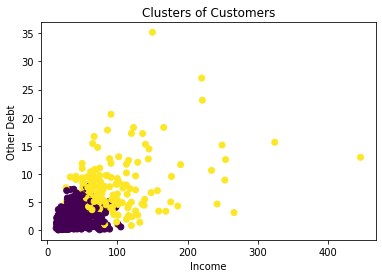

In [ ]:
df_clean

# Save the cluster labels to the dataframe
df_clean['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['Income'], df['Other Debt'], c = df_clean['cluster'])
plt.xlabel('Income')
plt.ylabel('Other Debt')
plt.title('Clusters of Customers');


In [ ]:
df_clean.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


Text(0.5, 0, 'clusters')

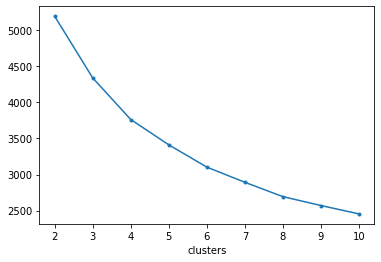

In [ ]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_clean_scaled)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
#plt.ylabel('inertia')

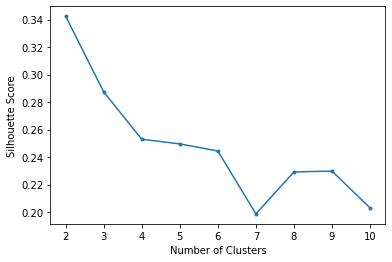

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_clean_scaled)
  silhouette_scores.append(silhouette_score(df_clean_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

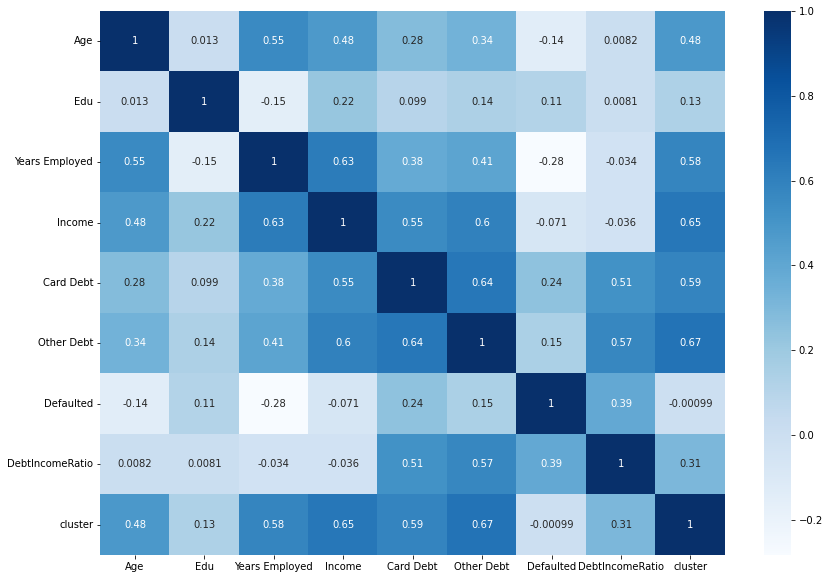

In [ ]:
corr = df_clean.corr()
plt.figure(figsize = (14,10));
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df_clean.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,33.054896,1.646884,6.557864,33.942136,0.940387,1.91762,0.261649,9.118694
1,1,42.590909,1.954545,16.255682,95.437500,4.014068,7.52546,0.260563,14.203977


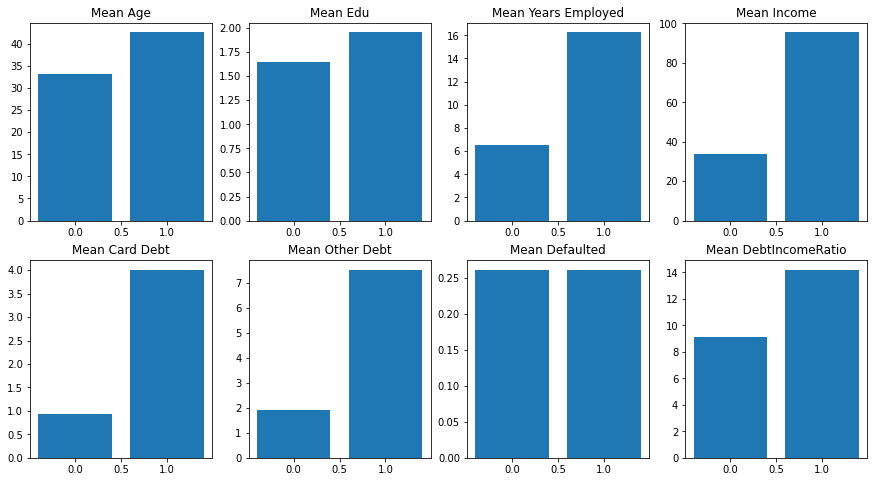

In [ ]:
# Visualize means
fig, axes = plt.subplots(2,4, figsize = (15, 8))
# fig is an array of dimensions 3,3.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

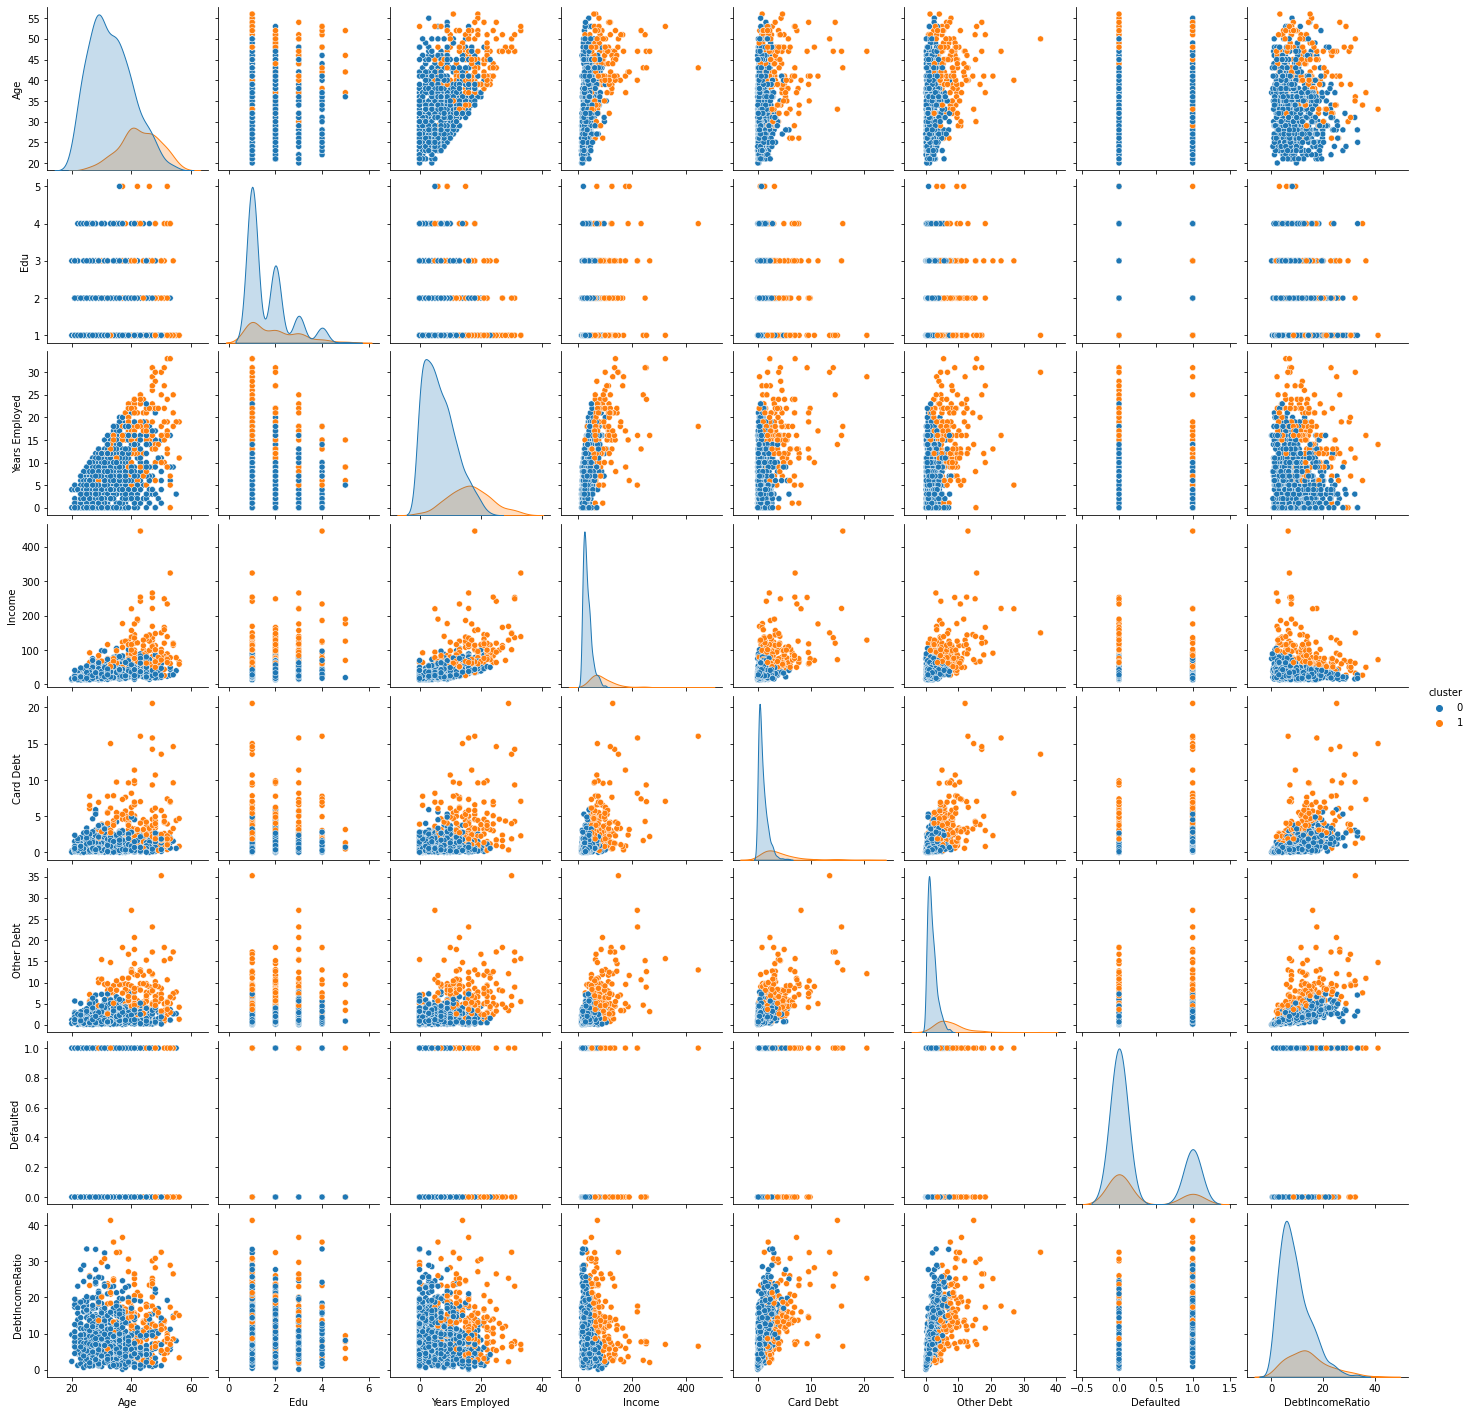

In [ ]:
import seaborn as sns
sns.pairplot(df_clean, hue = 'cluster');

#This represents visualizations for each feature

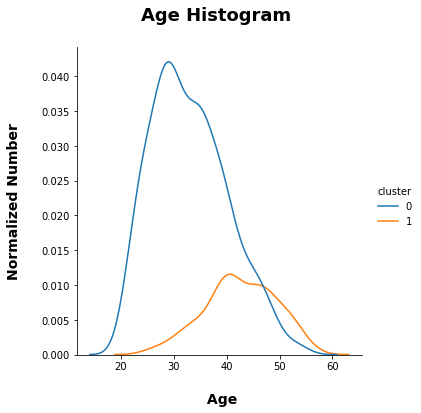

In [ ]:
sns.displot(df_clean, x="Age", hue = 'cluster',kind="kde");
# I liked the look of the one in the pairplot so I found it
# https://seaborn.pydata.org/tutorial/distributions.html

# Title and labels
plt.title('Age Histogram \n', fontsize = 18, weight='bold');
plt.xlabel('\n Age', fontsize = 14, weight='bold');
plt.ylabel('Normalized Number\n', fontsize = 14, weight='bold');





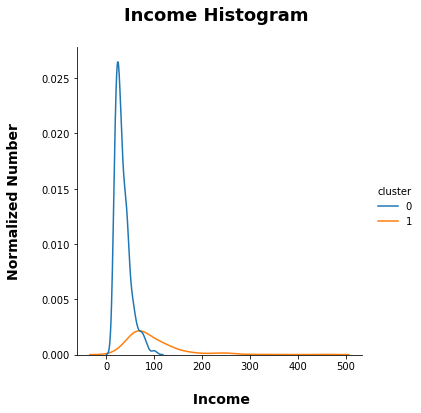

In [ ]:
sns.displot(df_clean, x="Income", hue = 'cluster',kind="kde");
# I liked the look of the one in the pairplot so I found it
# https://seaborn.pydata.org/tutorial/distributions.html

# Title and labels
plt.title('Income Histogram \n', fontsize = 18, weight='bold');
plt.xlabel('\n Income', fontsize = 14, weight='bold');
plt.ylabel('Normalized Number\n', fontsize = 14, weight='bold');

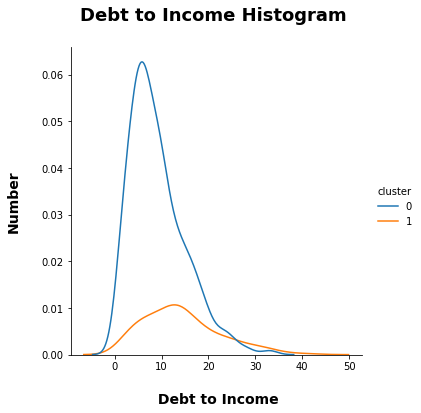

In [ ]:
#DebtIncomeRatio
sns.displot(df_clean, x="DebtIncomeRatio", hue = 'cluster',kind="kde");
# I liked the look of the one in the pairplot so I found it
# https://seaborn.pydata.org/tutorial/distributions.html

# Title and labels
plt.title('Debt to Income Histogram \n', fontsize = 18, weight='bold');
plt.xlabel('\n Debt to Income', fontsize = 14, weight='bold');
plt.ylabel('Number\n', fontsize = 14, weight='bold');

# Description of each cluster

Cluster 1 represents younger people who have been in the workforce for less time and they typically have lower income.  There are many more of them but they don't carry much debt.  They maintain default levels similar to cluster 0.

Cluster 0 represents older people who have been in the workforce for longer.  There are fewer of them but they maintain higher credit card and other debt levels.  

Interestingly, there looks like there is a local max in the sil data at 6 clusters.  It might be interesting to see that that reveals . . .

Note: I made a copy of this notebook, dropped the rows with no default data and ran it with 3 clusters.  It yielded one class with virtually all the defaults.  This class was young, highly educated, low income, low number of years worked, and high debt.  Surprise, millennials!      

If we are trying to determine if someone is going to default we should use a classification and have a target of default or not.  However, this is a clustering exercise.  


# Recommendation

The goal of this clustering exercise is to help the company effectively allocate marketing resources.  As such, there are two segments 1) younger people with low income and who maintain low levels of debt but there are a lot of them and 2) older, hight income people who carry much more debt but there are fewer of them.  What is the goal of marketing?  Are we trying to earn money from interest?  Then we should target the older, high income market.  Are we trying to earn fees by having people open accounts?  Target the younger group.

In either case, we should avoid the class with high risk of defaulting.